<a href="https://colab.research.google.com/github/aguusandy/ic_2023/blob/master/inteligencia_guia4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guia 4 Práctica IC 2023


## Ejercicio 1:
Implemente el algoritmo de
entrenamiento de un SOM bidimensional de forma que se pueda ver graficamente el mapa topologico durante todo el proceso. Para poder observar el ordenamiento topologico, en el mapa grafique lıneas de union entre pares de neuronas vecinas. Realice las pruebas de ordenamiento topologico con los patrones provistos en los archivos circulo.csv y te.csv, usando un maximo de 1000 epocas de entrenamiento. Dichos datos fueron generados aleatoriamente con distribucion uniforme dentro de las siguientes figuras planas:
i) un cırculo de radio 1 centrado en el origen;
ii) una T como muestra la figura.


In [1]:
# importamos los datos
import numpy as np
import matplotlib.pyplot as plt

datos_circulo = np.genfromtxt("circulo.csv", delimiter="," , skip_header=1)
datos_te = np.genfromtxt("te.csv", delimiter="," , skip_header=1)

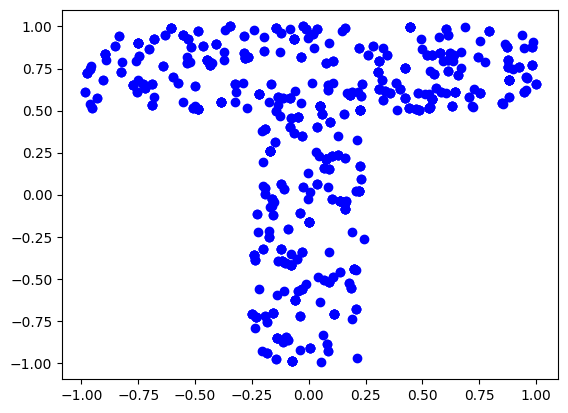

In [ ]:
for i in np.arange(0,len(datos_te)):
  plt.plot(datos_te[i][0],datos_te[i][1],'bo')
plt.show()

In [16]:
# definimos algunas variables de utilidad
red_size = 9
data_size_circulo = len(datos_circulo)
data_size_te = len(datos_te)


In [2]:
# definimos el array de pesos
def crear_pesos(red_size,dimension_data):
  pesos = np.full(red_size,None)
  for i in np.arange(0,red_size):
    pesos[i] = np.random.rand(red_size,dimension_data)-0.5
  return pesos
#print(pesos_ej1)

In [3]:
# funcion que busca el peso minimo entre un array de pesos y un unico patron,
# devuelve el indice en i y en j de la neurona elegida
def nodo_min_dist(pesos, patron):
  size_pesos = len(pesos)
  minimos =  np.full([size_pesos,2],None)
  distancia_v = np.full(size_pesos,None)
  for i in np.arange(0,size_pesos):
    for j in np.arange(0,len(distancia_v)):
      distancia_v[j] = np.linalg.norm(pesos[i][j]-patron,2)
    ind_min = np.argmin(distancia_v)
    minimos[i] = [ind_min,distancia_v[ind_min]]
  ind_i = np.argmin(minimos[:,1])
  ind_j = minimos[ind_i,0]
  return ind_i,ind_j

In [4]:
def plot_neuronas(nodos,iteracion):
  # plot(x, y, color='green', marker='o', linestyle='dashed',linewidth=2)
  #print(nodos[1])
  plt.clf()
  plt.title('Vecindad para la iteracion '+str(iteracion))
  #plt.xlim([-0.5,1.5])
  #plt.ylim([-0.5,1.5])
  plt.xlabel('Posicion en x')
  plt.ylabel('Posicion en y')
  for i in np.arange(0,len(nodos)):
    nodo = nodos[i]
    for j in np.arange(0,len(nodo)):
       plt.plot(nodo[j][0],nodo[j][1],'ko')
  plt.show()

In [13]:
def actualizar_pesos(ind_i,ind_j,tasa,distancia_vecindad,patron,pesos):
  if distancia_vecindad == 0: # si la distancia de vecindad es 0, solo actualizamos la neurona elegida
    pesos[ind_i][ind_j]+= tasa*(patron - pesos[ind_i][ind_j])
    return
  else:
    # actualizo primero la fila de la neurona elegida,
    pesos[ind_i][ind_j]+= tasa*(patron - pesos[ind_i][ind_j])
    # tengo que actualizar la neurona y todas las vecinas que esten dentro de la distancia de vecindad en esa misma fila
    for n in np.arange(0,distancia_vecindad):
      if (ind_i + n < len(pesos[0])):
        pesos[ind_i + n][ind_j]+= tasa*(patron - pesos[ind_i + n][ind_j])
      if(ind_i - n >= 0):
        pesos[ind_i - n][ind_j]+= tasa*(patron - pesos[ind_i - n][ind_j])
    # tengo que actualizar las filas de arriba y abajo que esten dentro de la distancia de vecindad
    for j in np.arange(1,distancia_vecindad):
      for i in np.arange(0,distancia_vecindad-j):
        # veo que no se salga de la malla de neuronas
        if (ind_i + i < len(pesos[0]) and ind_j + j < len(pesos[0])):
          pesos[ind_i + i][ind_j + j]+= tasa*(patron - pesos[ind_i + i][ind_j + j])
        if(ind_i + i < len(pesos[0]) and ind_j - j >= 0):
          pesos[ind_i + i][ind_j - j]+= tasa*(patron - pesos[ind_i + i][ind_j - j])
        # if i > 0:
        if(ind_i - i >= 0 and ind_j + j < len(pesos[0])):
          pesos[ind_i - i][ind_j + j]+= tasa*(patron - pesos[ind_i - i][ind_j + j])
        if(ind_i - i >= 0 and ind_j - j >= 0):
          pesos[ind_i - i][ind_j - j]+= tasa*(patron - pesos[ind_i - i][ind_j - j])

In [6]:
def som_train(iter_max,pesos,tasa,datos,data_size,distancia_vecindad):
  for n in np.arange(0,iter_max):
    for j in np.arange(0,data_size):
      ind_i,ind_j = nodo_min_dist(pesos, datos[j])
      if np.linalg.norm(datos[j] - pesos[ind_i][ind_j],2) > 0.001:
        actualizar_pesos(ind_i,ind_j,tasa[n],distancia_vecindad,datos[j],pesos)
      #   print('pesos antes de actualizar', pesos[ind_i][ind_j])
      #   print('entrada ',datos[j])
      #   actualizar_pesos(ind_i,ind_j,tasa[n],distancia_vecindad,datos[j],pesos)
      #   print('pesos despues de actualizar', pesos[ind_i][ind_j])
      #   print('------------------')
    if(n % 20 == 0):
      plot_neuronas(pesos,n)


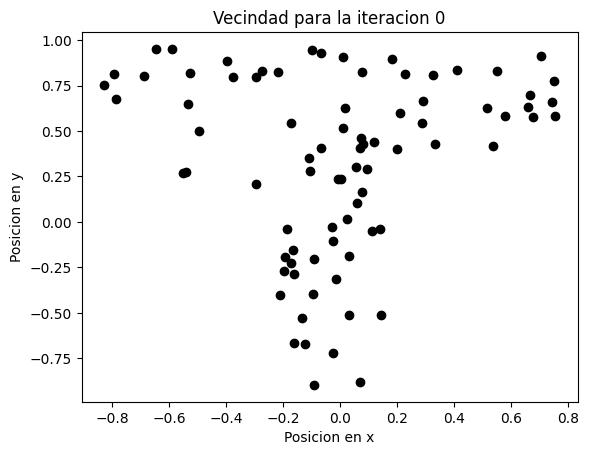

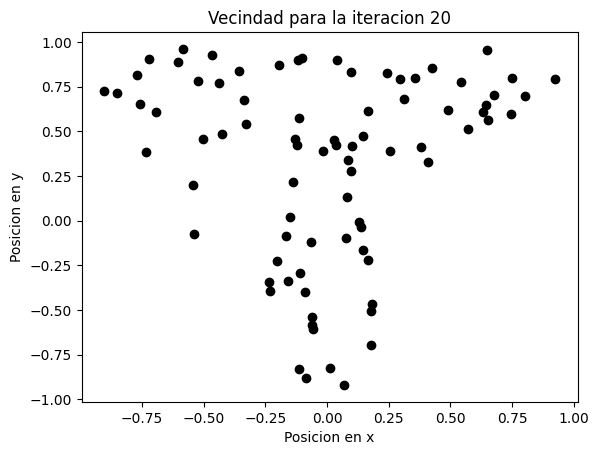

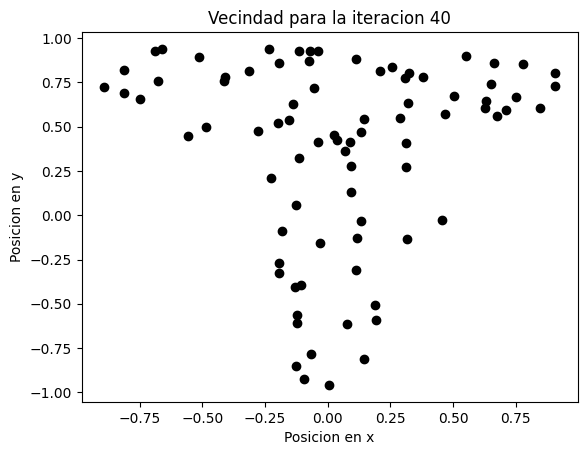

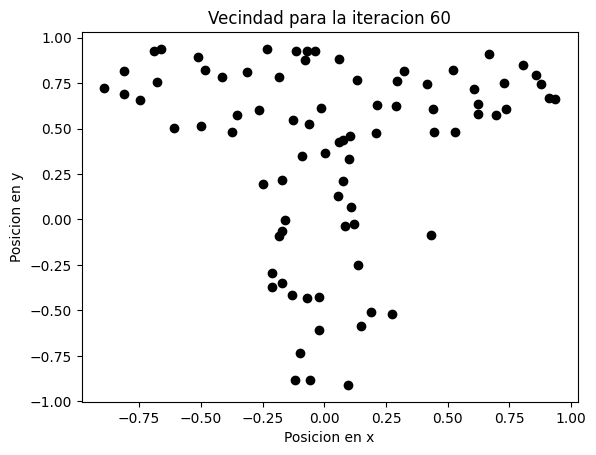

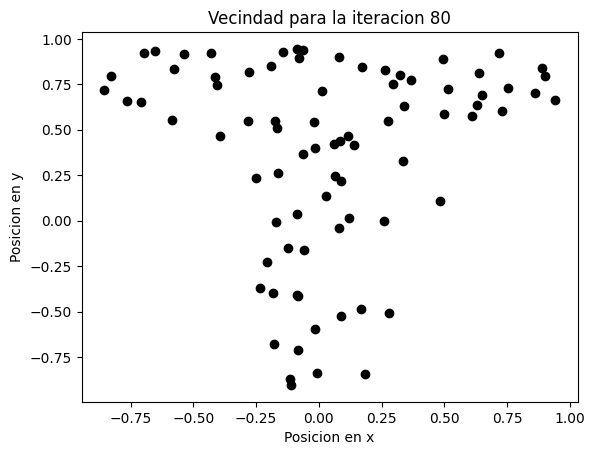

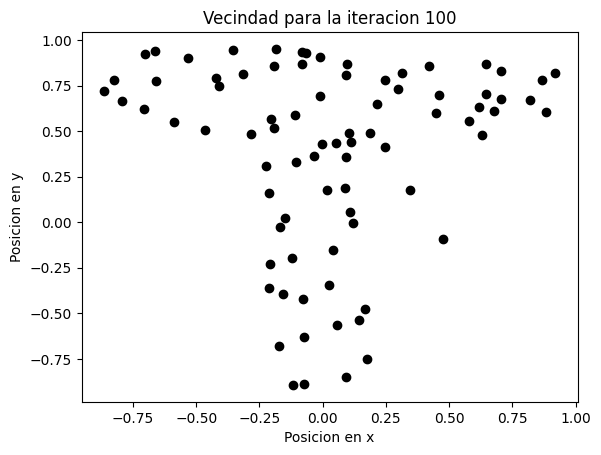

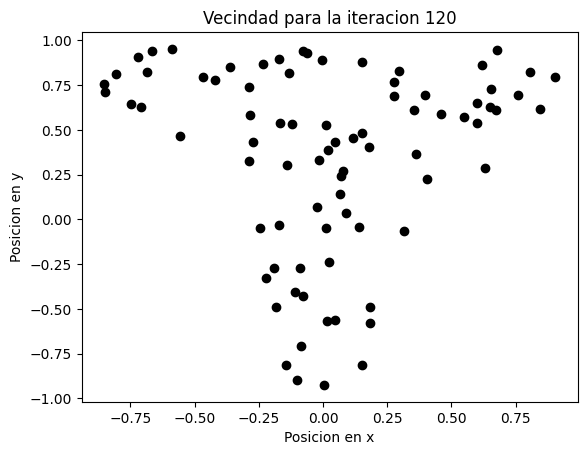

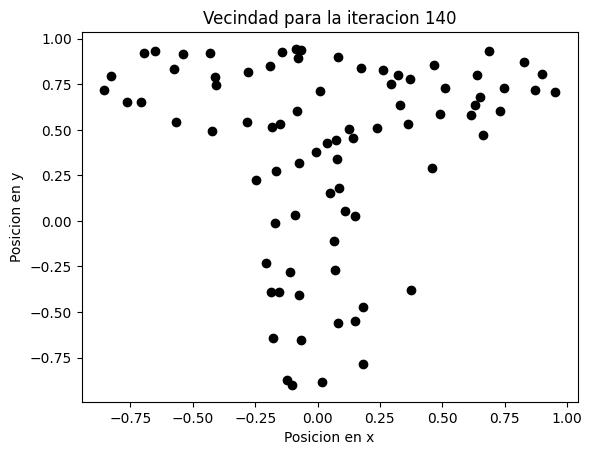

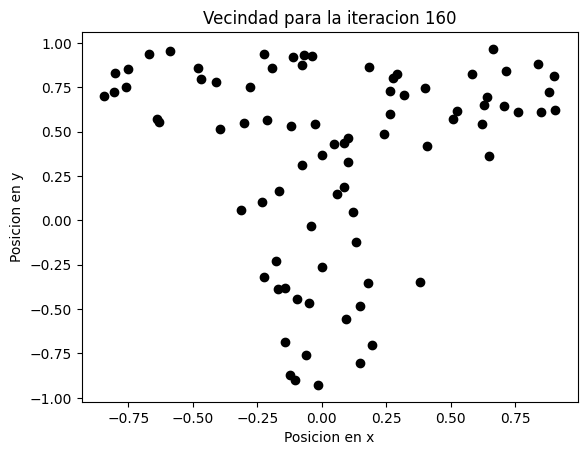

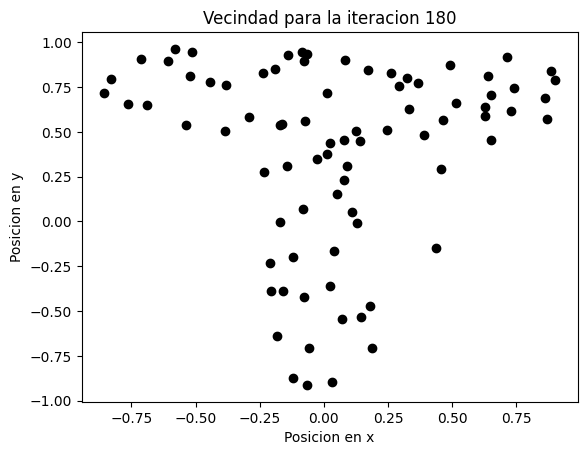

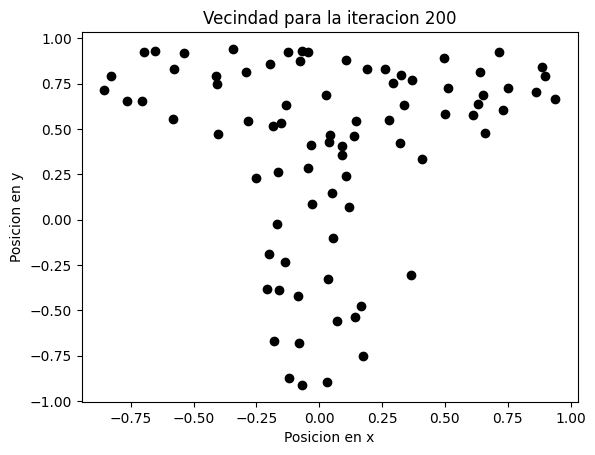

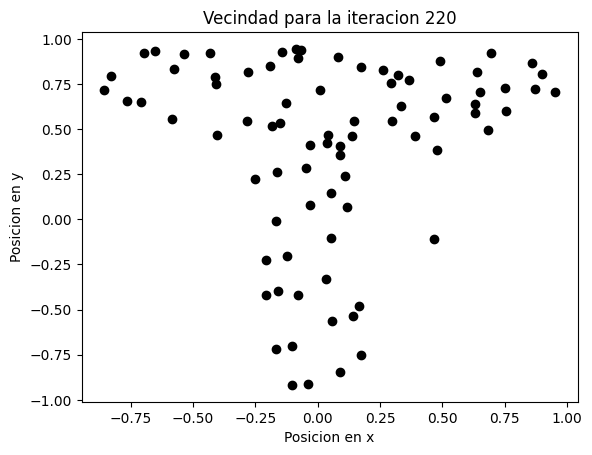

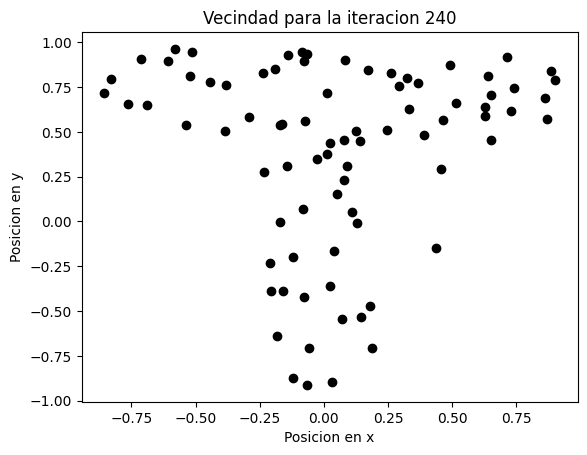

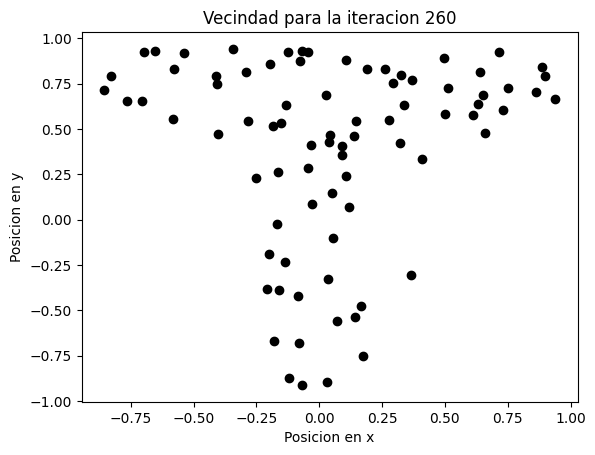

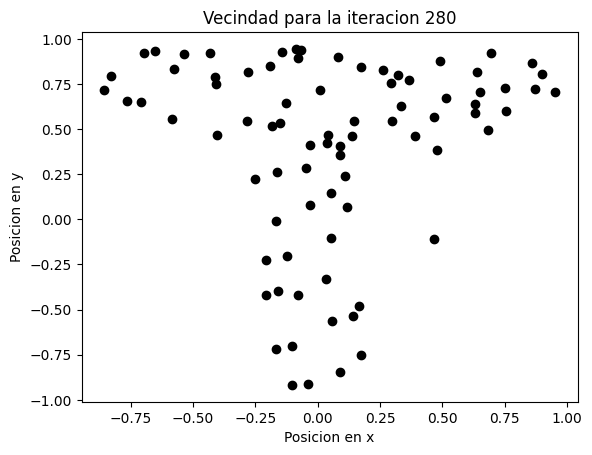

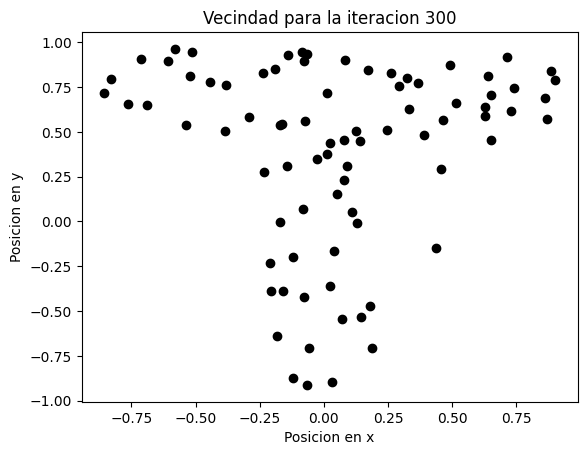

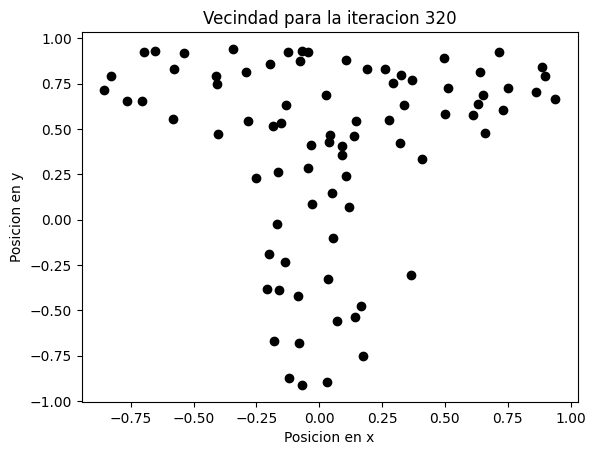

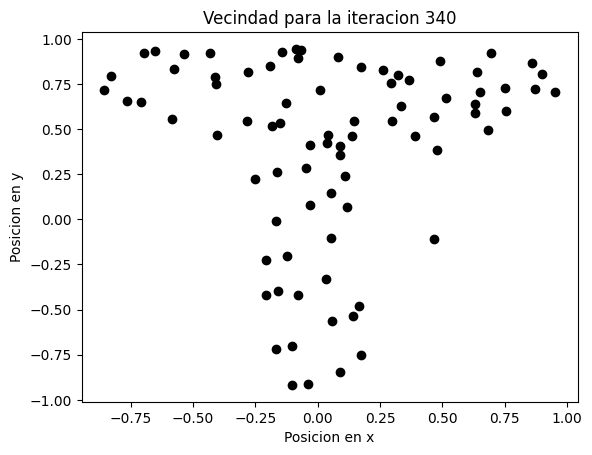

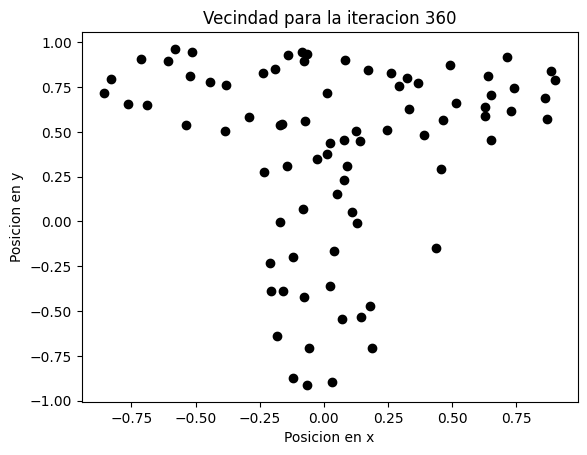

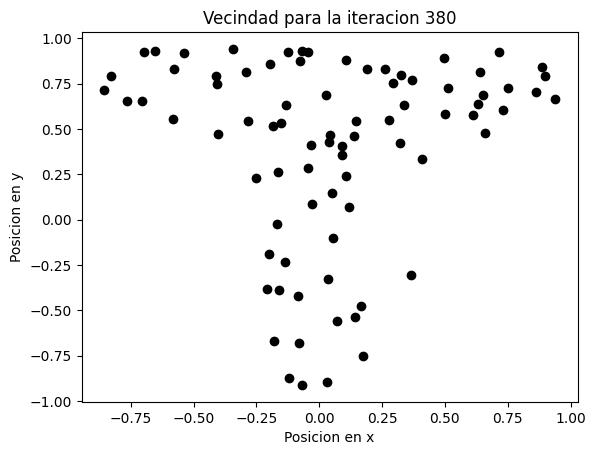

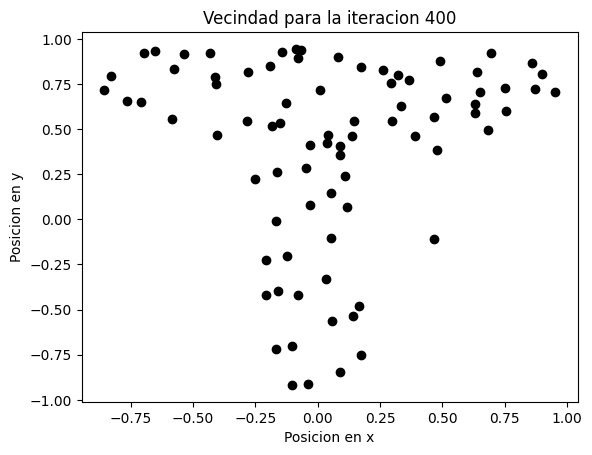

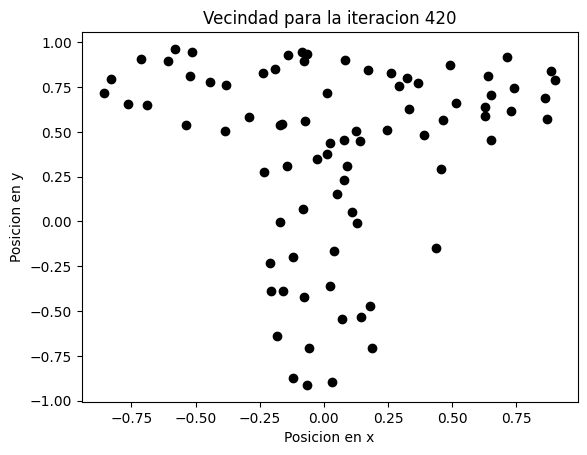

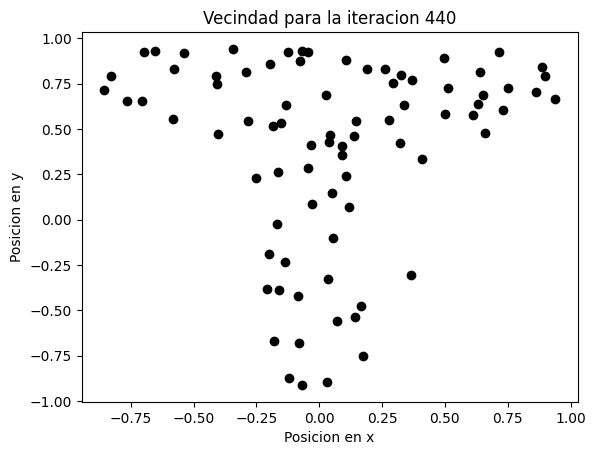

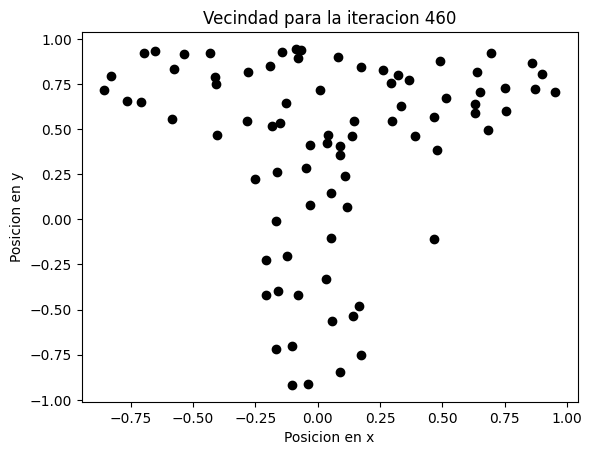

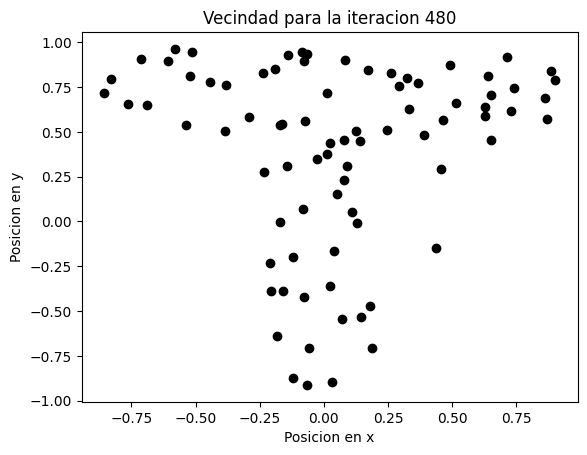

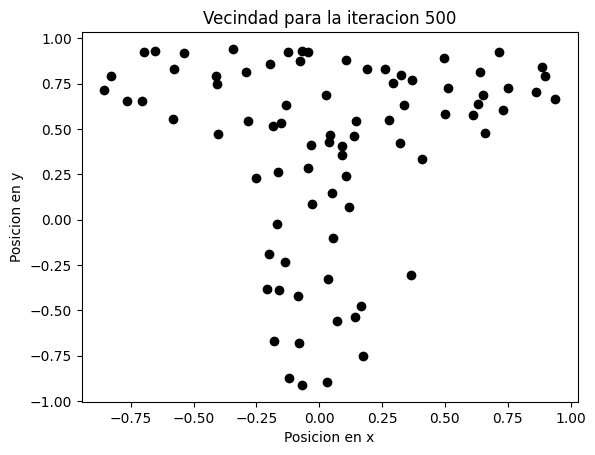

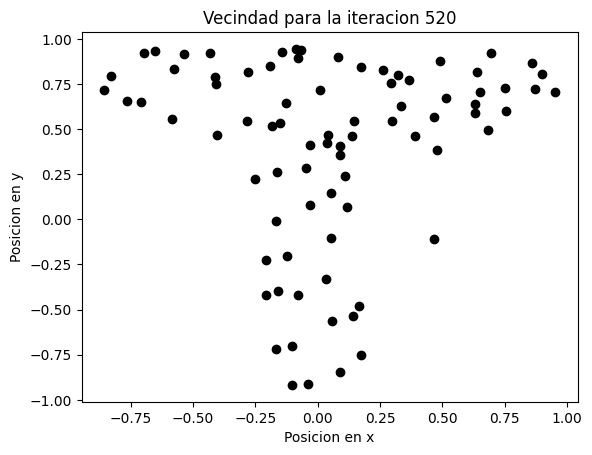

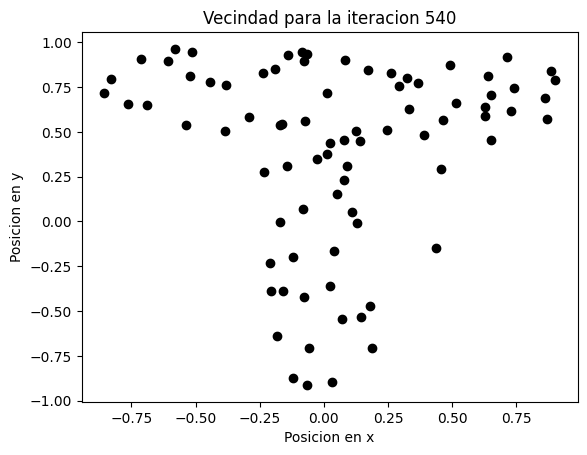

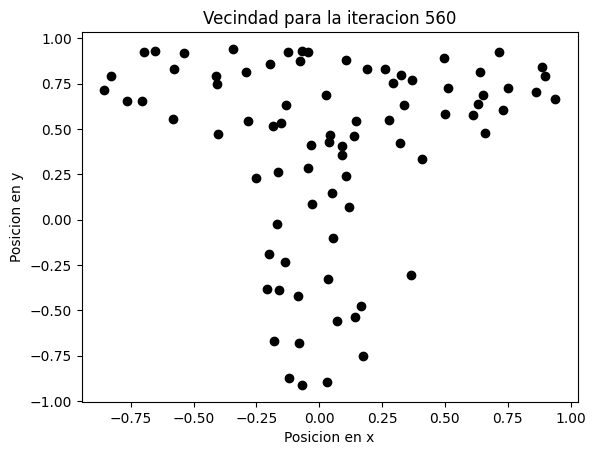

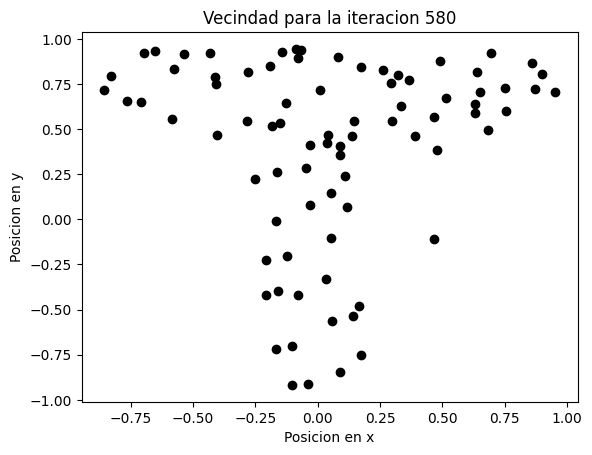

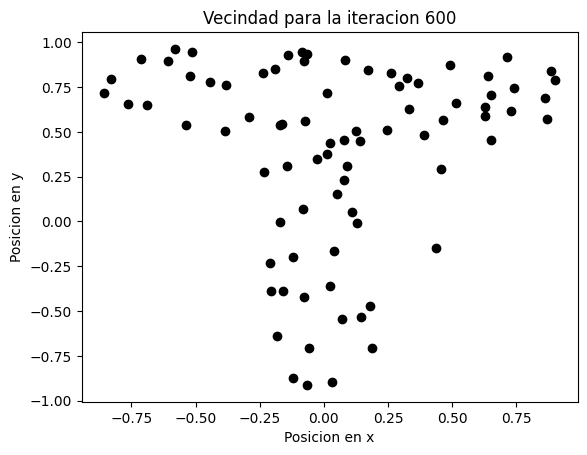

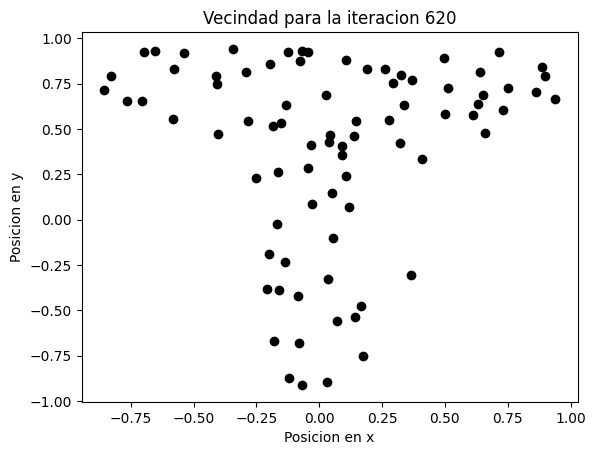

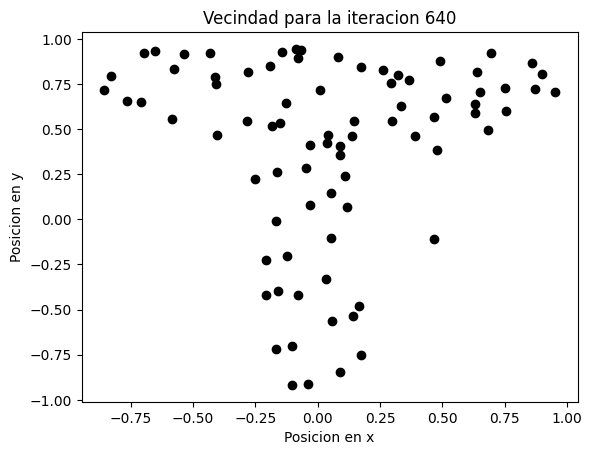

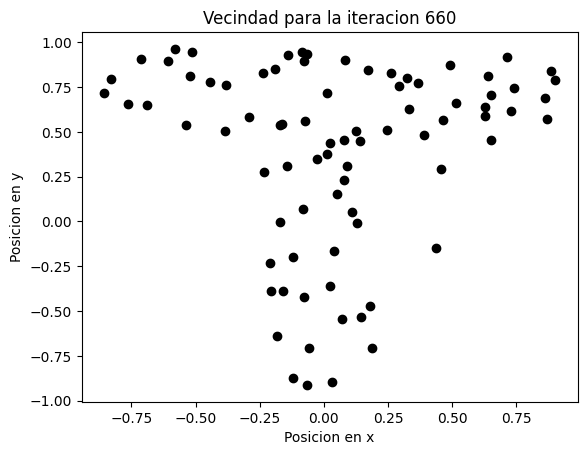

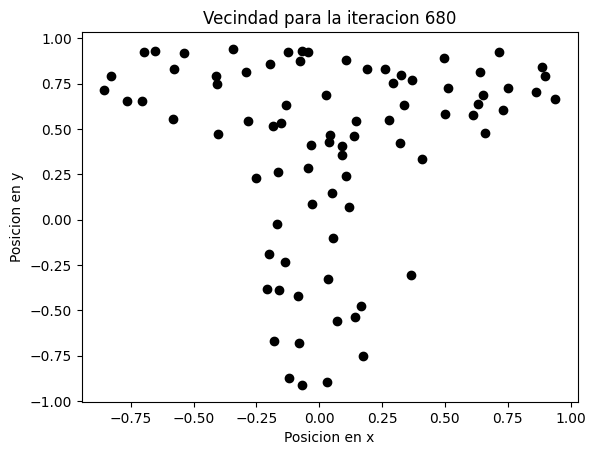

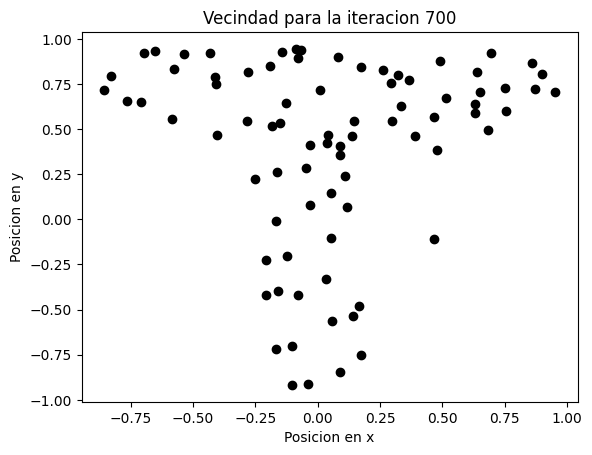

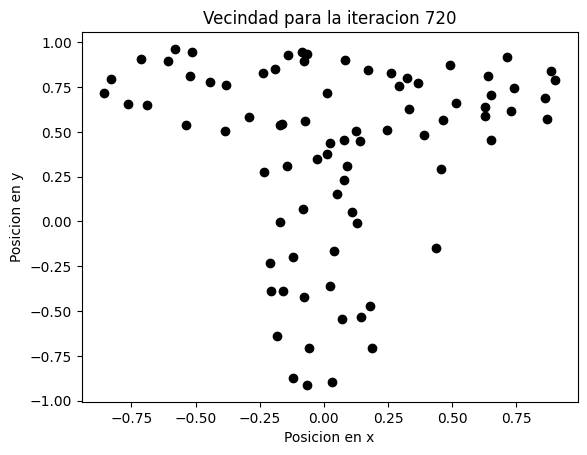

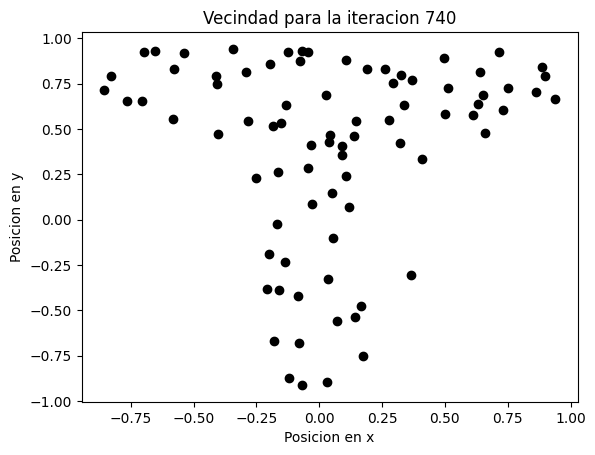

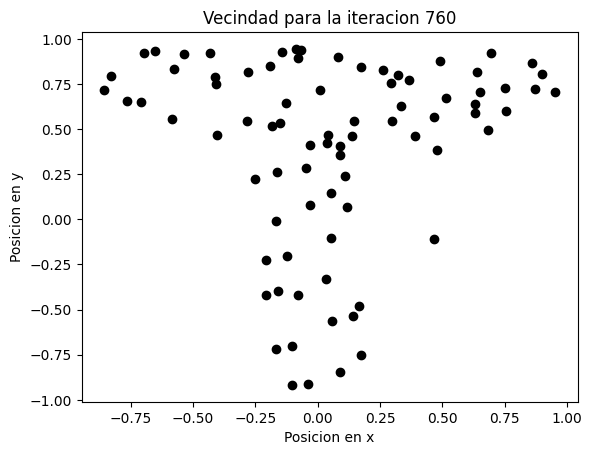

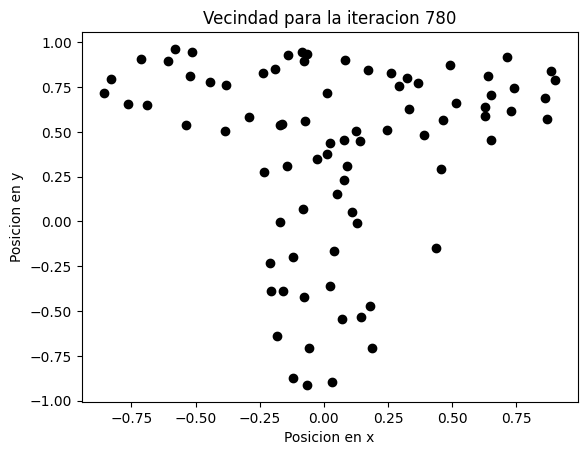

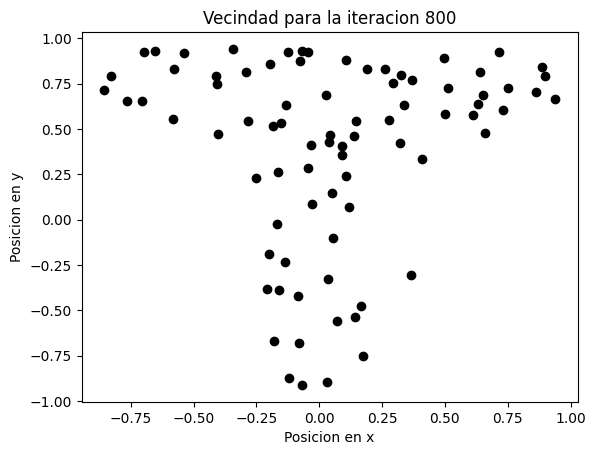

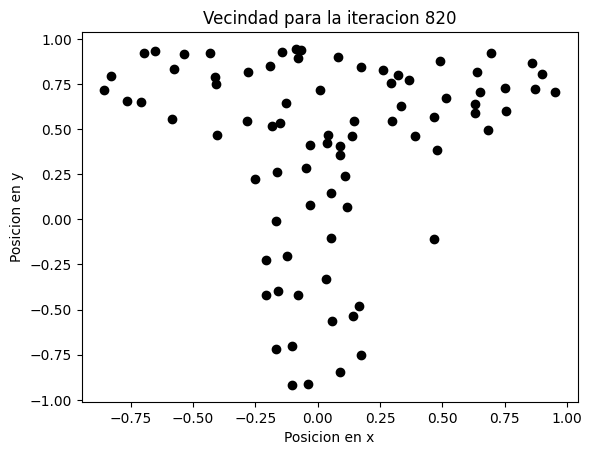

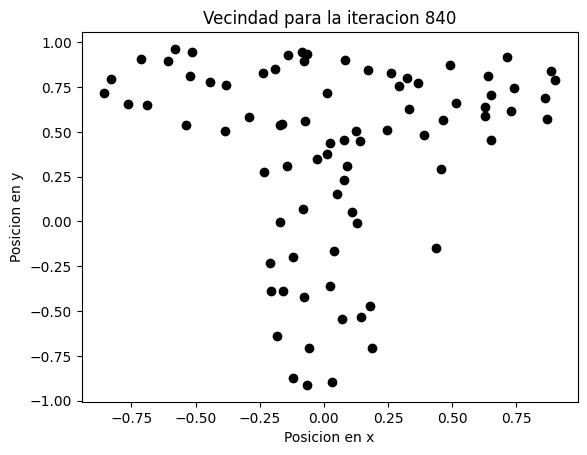

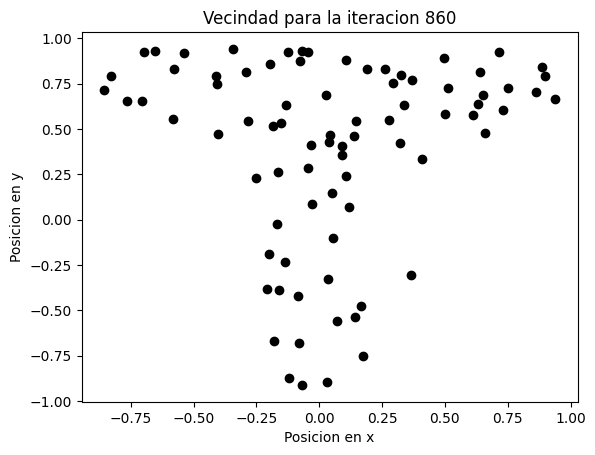

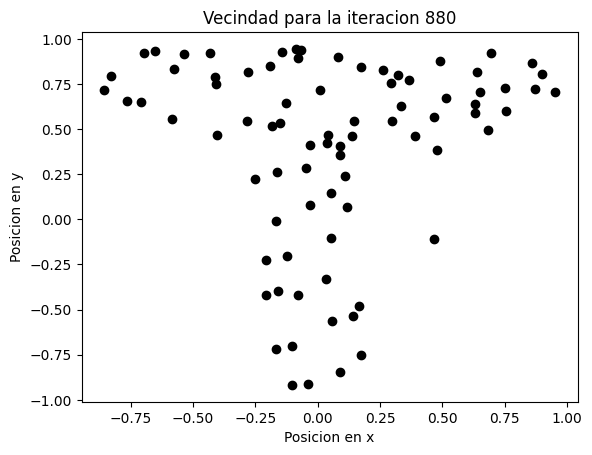

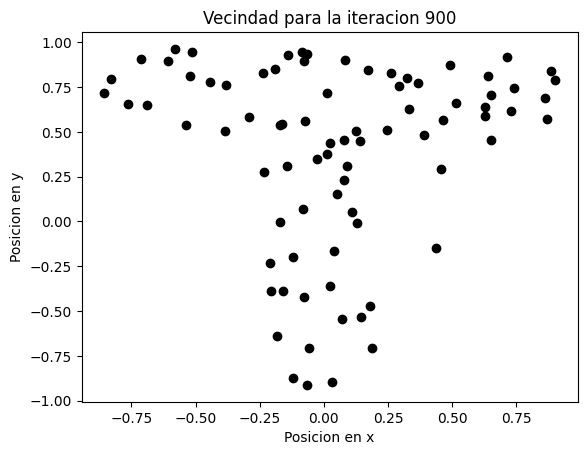

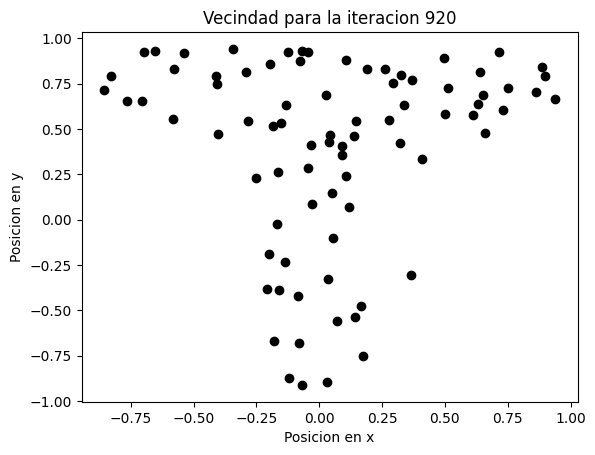

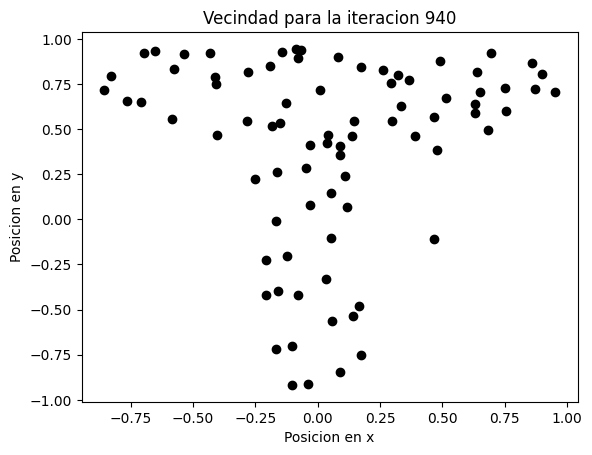

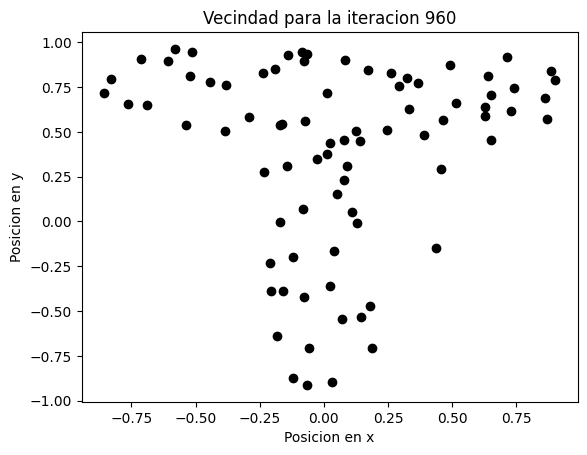

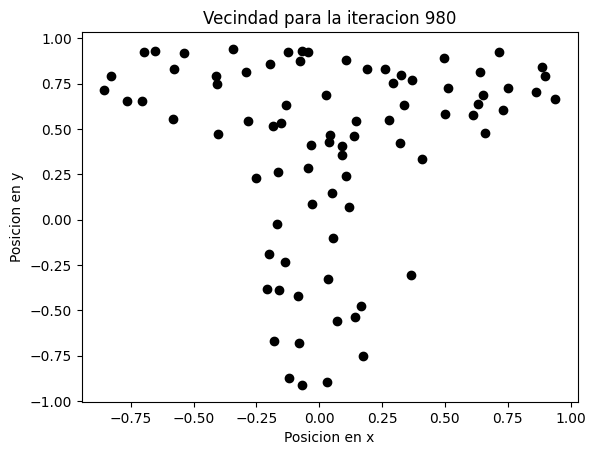

In [20]:
iter_max = 1000
dist_vecindad = 2
tasa1 = 0.2*np.ones(iter_max)
dimension_te = len(datos_te[0])
pesos_ej1 = crear_pesos(red_size,dimension_te)
som_train(iter_max,pesos_ej1,tasa1,datos_te,data_size_te,dist_vecindad)

# Ejercicio 2:
Implemente el método de clustering k-medias sobre el conjunto de datos Iris (GTP2) y compare las soluciones obtenidas con las de un SOM en estos mismos datos con una matriz de contingencia.

# Ejercicio 3:
Pruebe varios valores de k (por ejemplo entre 2 y 10) para el conjunto de datos Iris, calcule para cada k una métrica de clustering (con sklearn) y encuentre el k óptimo para k-medias.